# Cálculo - Tarefa 02

1- Calcule de forma numérica a integral da função $x^3$ avaliada entre os pontos $1$ e $2$. Identifique o número de retângulos que você usou.  
2- Calcule essa área de forma analítica.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from matplotlib.animation import FuncAnimation, PillowWriter 
from IPython.display import HTML

%matplotlib inline

### 1-Cálculo de forma numérica a integral da função  𝑥3  avaliada entre os pontos  1  e  2.

In [2]:
import numpy as np

# Define a função a ser integrada
def func(x):
    return x**3

# Define os limites de integração
a = 1
b = 2

# Define o número de retângulos
num_retangulos = 10

# Calcula a largura do retângulo
delta = (b - a) / num_retangulos

# Cria um array com os pontos médios dos retângulos
x_cols = np.linspace(a + delta/2, b - delta/2, num_retangulos)

# Calcula a altura dos retângulos (valor da função nos pontos médios)
y_cols = func(x_cols)

# Calcula a área dos retângulos
areas = delta * y_cols

# Soma as áreas dos retângulos para obter a aproximação da integral
integral_numerica = round(sum(areas),2)

print("A integral numérica da função x³ entre os pontos 1 e 2 é", integral_numerica)

A integral numérica da função x³ entre os pontos 1 e 2 é 3.75


### 2- Cálculo da área de forma analítica

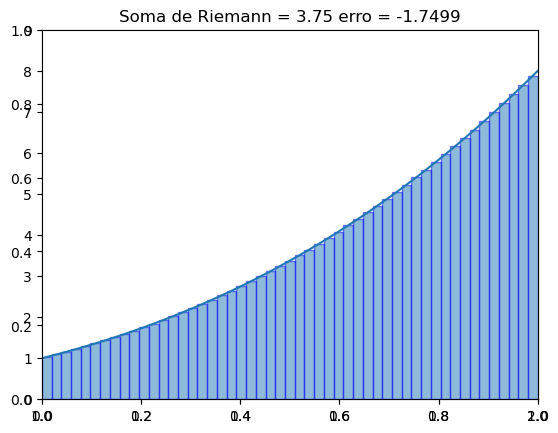

In [3]:
f = lambda x: (x**3)

def calcula_area(a, b, func, frame_num):
    num_bins=frame_num+1 # Quantidade de retângulos
    delta = (b-a)/num_bins # largura do retângulo
    x_cols = np.linspace(a, b-delta, num_bins)+delta/2 # Divisão do eixo X
    y_cols = f(x_cols) # alturas dos retângulos
    return sum(delta*y_cols)
    

def animate(n, a=1, b=2, func=f, verdadeiro_valor = 2):
    
    plt.cla()  # Limpa o gráfico anterior para montar o próxim frame
    ax = plt.axes(xlim=(a, b), ylim = (0, 9))  # Monta o sistema de eixos
    
    # Plota a função
    x = np.linspace(a ,b, 100)
    y = f(x)
    ax.plot(x, y, '-');
    
    # Define as quebras e as alturas das colunas
    num_bins=n+1
    delta = (b-a)/num_bins
    x_cols = np.linspace(a, b-delta, num_bins)+delta/2
    y_cols = f(x_cols)

    # plota barras
    bar = ax.bar(x_cols, y_cols, alpha=.5, width = delta, edgecolor='blue')   

    # Área dos retângulos
    soma_riemann = calcula_area(a, b, func, n)
    
    # Erro
    erro = verdadeiro_valor - soma_riemann
    ax.set_title(f'Soma de Riemann = {soma_riemann:.2f} erro = {erro:.4f}')

    return bar
animate(50);

Wall time: 26 s


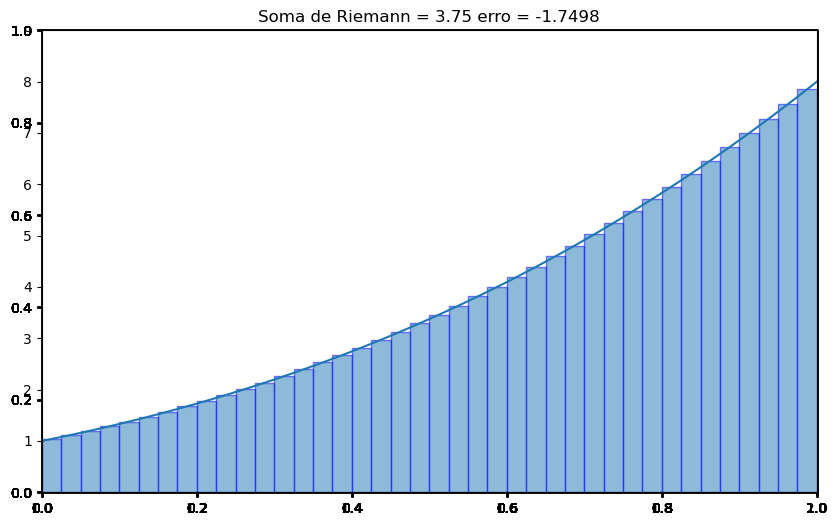

In [4]:
%%time
%matplotlib inline

fig = plt.figure(figsize=(10, 6))  # make a new figure
ax = plt.subplot(1,1,1)   

ani = FuncAnimation(fig, animate, frames=40, interval=120, blit=True)
# ani.save('riemann_sum2.gif',writer="imagemagick")
HTML(ani.to_jshtml())